# <b>CP Module3 - Customer Lifetime Value</b>

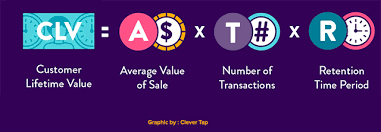

---
# BUSINESS PROBLEM : CLV Car Insurance

Business have their own strategies to improve the company profit. One of the crucial strategis is identifying customers who can provide significant contribution to company, which can be calculated using Customer Lifetime Value (CLV). CLV measures total revenue generated by customer. This process can help company to design strategy and allocate resources efficiently, also focus on searching the potential customers.

In the context of a <u>car insurance company</u>, CLV can help predict the potential profits that company can earn, for example from the number of policies, monthly premiums, and the number of claims. Customer demographic data (e.g. occupation, status, education, type of insured vehicle) can describe the customer behavior patterns that relate to the CLV value. For example, customers with luxury vehicles who pay higher premiums coverage but rarely file claim may have a higher value of CLV. But if the customer file claims frequently, the CLV value can decrease. Understanding these factors can help teams like **marketing, sales, and claims operations** analyze and identify the most valuable customers which allows company to achieve their optimal profits.

Car insurance companies face several challenges in maximizing CLV, including high churn rates and claims costs. Retaining customers can be a challenge, but acquiring new customers can be more expensive, especially when premiums are low. High claims or fraud can also decrease the profitability. By predicting CLV accurately, the company can identify which customers that have long-term potential and ensure that costs and resources are allocated more efficiently, reduce churn (customers leaving the company), and maximize company revenue.

Based on the relevant data that we have, we can use to calculate and analyze the CLV, which can identify patterns and characteristic of customers. The data includes:
| **Features** | **Features Information** |
| --- | --- |
| Vehicle Class | Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car |
| EmploymentStatus | Retired, Employed, Disabled, Medical Leave, Unemployed |
| Marital Status | Divorced, Married, Single |
| Education | High School or Below, College, Master, Bachelor, Doctor |
| Income | Customer information range |
| Coverage | Extended, Basic, Premium |
| Renew Offer Type | Offer1, Offer3, Offer2, Offer4 |
| Number of Policies | 2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0 |
| Monthly Premium Auto | Range of monthly purchased premium by customer |
| Total Claim Amount | Total amount of customer claims |
| Customer Lifetime Value | CLV |

From the data above, we can see the customer profile to build an accurate model to predict the CLV. The process of determining the predicted CLV is based on the company’s historical data with the mentioned parameters. The best regression model can be found and evaluated by looking at the MAE (Mean Absolute Error) and MAPE (Mean Absolute Percentage Error) values. The smaller these two values are, the more accurate the CLV prediction model will be. 

---

# DATA UNDERSTANDING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<b>Input Data :

In [2]:
rawdata = pd.read_csv('data_customer_lifetime_value.csv')

<b>Copy Data :

In [3]:
df = rawdata.copy()
df

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


In [4]:
pd.set_option('display.max_colwidth', None)

list_item = []
for column in df.columns :
    list_item.append([column, df[column].nunique(), df[column].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=list_item)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Vehicle Class,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
1,Coverage,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
4,Marital Status,3,"[Divorced, Married, Single]"
5,Education,5,"[High School or Below, College, Master, Bachelor, Doctor]"
6,Number of Policies,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0, 63.0, 70.0, 71.0, 61.0, 64.0, 129.0, 100.0, 68.0, 126.0, 95.0, 128.0, 84.0, 125.0, 98.0, 97.0, 121.0, 192.0, 69.0, 83.0, 72.0, 67.0, 103.0, 74.0, 89.0, 86.0, 110.0, 124.0, 73.0, 191.0, 122.0, 133.0, 165.0, 127.0, 144.0, 114.0, 194.0, 118.0, 111.0, 138.0, 119.0, 76.0, 80.0, 154.0, 189.0, 130.0, 109.0, 161.0, 88.0, 93.0, 113.0, 87.0, 136.0, 106.0, 99.0, 105.0, 82.0, 96.0, 159.0, 181.0, 146.0, 115.0, 187.0, 108.0, 209.0, 102.0, 104.0, 77.0, 79.0, 283.0, 150.0, 92.0, 91.0, 180.0, 131.0, 112.0, 184.0, 137.0, 185.0, 94.0, 198.0, 135.0, 140.0, 132.0, 139.0, 85.0, 123.0, 214.0, 201.0, 155.0, 193.0, 81.0, ...]"
8,Total Claim Amount,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772, 582.781896, 39.781368, 227.44626, 347.857619, 239.328571, 340.8, 439.2, 307.2, 1178.950186, 480.0, 350.65008, 51.961915, 907.2, 423.787608, 234.683628, 456.0, 614.4, 475.2, 286.781601, 788.206874, 600.0, 265.877583, 513.6, 196.37368, 312.0, 335.840529, 580.8, 1921.248929, 331.2, 389.636991, 229.620398, 159.266473, 291.91645, 321.6, 685.227276, 355.2, 616.005527, 395.729716, 302.4, 287.5426, 528.0, 282.500791, 135.892444, 316.8, 525.6, 604.8, 981.010879, 650.52179, 668.29397, 349.954886, 345.6, 638.4, 1452.213743, 609.6, 93.128128, 297.6, 292.8, 268.471802, 624.023564, 245.447622, 476.903351, 624.711448, 820.431905, 547.2, 469.257835, 1067.291208, 416.2618, 566.4, 40.622304, 497.126827, 314.880326, 938.513425, 307.639408, 482.4, 29.984815, 290.70096, 30.874869, 199.79727, 384.0, 41.464402, 739.2, 571.2, 460.741097, 532.8, 206.810286, 199.851173, 799.2, 142.205246, 114.815893, 44.284642, 336.0, ...]"
9,Income,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0, 59624.0, 37813.0, 35624.0, 24910.0, 62739.0, 18608.0, 46210.0, 0.0, 15192.0, 50397.0, 82210.0, 22538.0, 31614.0, 78358.0, 36510.0, 51962.0, 45345.0, 62039.0, 66550.0, 71134.0, 26721.0, 66726.0, 40672.0, 44685.0, 78804.0, 23616.0, 38667.0, 59961.0, 57117.0, 25221.0, 33806.0, 46051.0, 42526.0, 43963.0, 52819.0, 50450.0, 51972.0, 72421.0, 38183.0, 20325.0, 51032.0, 20567.0, 23671.0, 45302.0, 21102.0, 53565.0, 59797.0, 47509.0, 22239.0, 14665.0, 64801.0, 44986.0, 43817.0, 36845.0, 49259.0, 26486.0, 56446.0, 67787.0, 89464.0, 22475.0, 31972.0, 58089.0, 41990.0, 84903.0, 67137.0, 21450.0, 99874.0, 26100.0, 31275.0, 71186.0, 91580.0, 69417.0, 88592.0, 26806.0, 23656.0, 94527.0, 44096.0, 66839.0, 18643.0, 58682.0, 87002.0, 47725.0, 22244.0, 26245.0, 61085.0, 62464.0, 48367.0, 59207.0, 75007.0, 72874.0, 72540.0, ...]"


In [5]:
display(df.describe(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


None

<b>Check for the duplicated data :

In [6]:
df.duplicated().sum()

618

In [7]:
# Duplication Example

df[df['Customer Lifetime Value'] == 2453.570794]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
399,Four-Door Car,Basic,Offer1,Medical Leave,Single,Bachelor,1.0,69.0,331.2,29735.0,2453.570794
2761,Four-Door Car,Basic,Offer1,Medical Leave,Single,Bachelor,1.0,69.0,331.2,29735.0,2453.570794
3643,Four-Door Car,Basic,Offer1,Medical Leave,Single,Bachelor,1.0,69.0,331.2,29735.0,2453.570794
4316,Four-Door Car,Basic,Offer1,Medical Leave,Single,Bachelor,1.0,69.0,331.2,29735.0,2453.570794
4645,Four-Door Car,Basic,Offer1,Medical Leave,Single,Bachelor,1.0,69.0,331.2,29735.0,2453.570794


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

<b>Check for the missing value :

In [10]:
df.isnull().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

In [11]:
# Confirm the value of "0"
df[df['Income']==0]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
16,Four-Door Car,Basic,Offer2,Unemployed,Married,Bachelor,7.0,64.0,307.200000,0.0,4774.751709
17,SUV,Extended,Offer1,Unemployed,Single,College,1.0,129.0,1178.950186,0.0,4711.845199
21,SUV,Extended,Offer4,Unemployed,Single,Bachelor,1.0,126.0,907.200000,0.0,4531.675269
24,Two-Door Car,Extended,Offer1,Unemployed,Divorced,Bachelor,5.0,95.0,456.000000,0.0,6846.150323
26,Four-Door Car,Basic,Offer4,Unemployed,Single,Bachelor,1.0,66.0,475.200000,0.0,2239.647297
...,...,...,...,...,...,...,...,...,...,...,...
5651,SUV,Extended,Offer1,Unemployed,Single,High School or Below,1.0,129.0,1486.410662,0.0,4502.867562
5652,Four-Door Car,Extended,Offer4,Unemployed,Married,Bachelor,5.0,95.0,456.000000,0.0,6661.744145
5655,Two-Door Car,Basic,Offer1,Unemployed,Married,Bachelor,9.0,67.0,132.443705,0.0,4927.707574
5660,Two-Door Car,Basic,Offer2,Unemployed,Single,College,7.0,72.0,391.636628,0.0,4936.888359


In [12]:
len(df[df['Income']==0]) / len(df) * 100

26.37101564046723

<i><u>Note</u><br>
An income of 0 does not mean a missing value. This is because there are customers who are **unemployed** and therefore do not have an income **(~26.37% of the data)**<br>
.............................................................................................................................................................................................................................................................................................................................................

---

<b>Numerical Data :

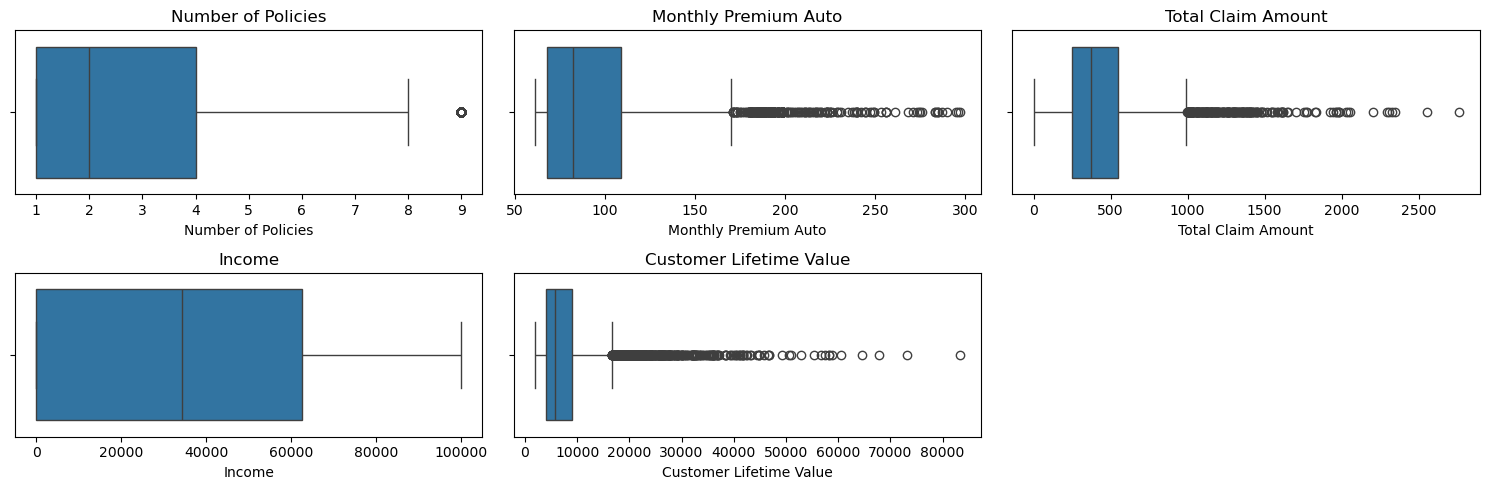

In [13]:
plt.figure(figsize=(15, 5))

# List of numerical data for further analysis
numerical_df = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create boxplots for each numerical feature
for i, num in enumerate(numerical_df, 1):
    plt.subplot(2, 3, i)  # Adjust the number of rows/columns as needed
    sns.boxplot(x=df[num])
    plt.title(num)

plt.tight_layout()
plt.show()

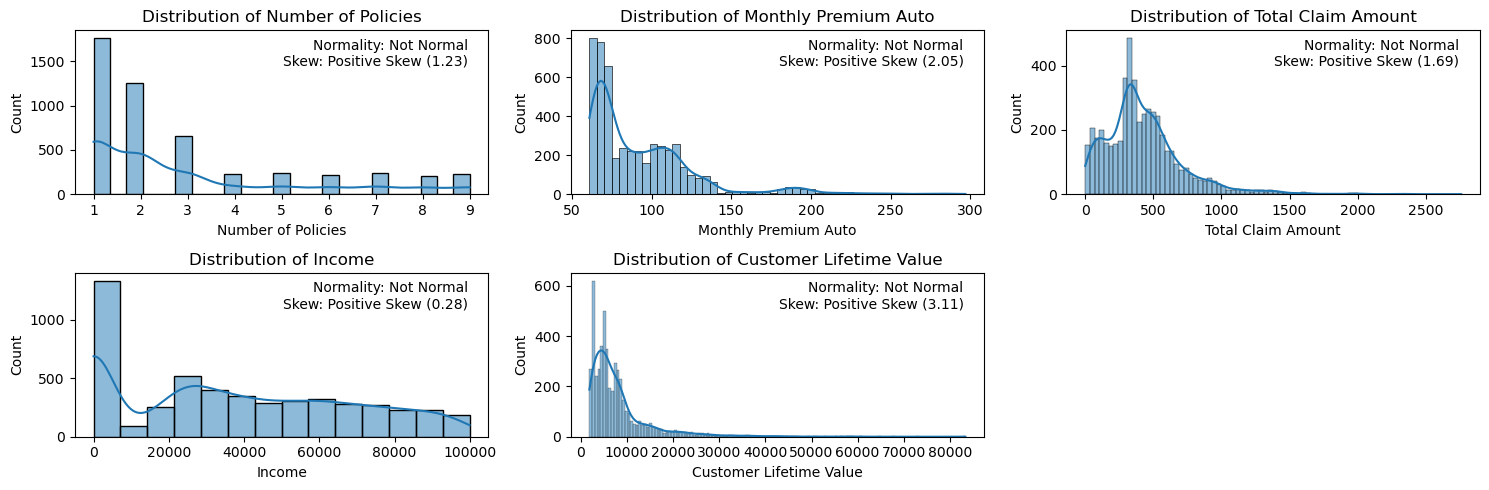

In [14]:
from scipy.stats import normaltest, skew

plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_df):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    # Normality test
    k2, p = normaltest(df[col])
    if p > 0.05 :
        normality = 'Normal'
    else: 
        normality = 'Not Normal'

    # Skewness
    skewness = skew(df[col])
    if skewness > 0   :
        skew_type = 'Positive Skew'
    elif skewness < 0 : 
        skew_type = 'No Skew'
    else: 
        skew_type = 'Negative Skew'

    plt.text(0.95, 0.95, f"Normality: {normality}\nSkew: {skew_type} ({round(skewness,2)})",
             transform=plt.gca().transAxes, ha='right', va='top')

plt.tight_layout()
plt.show()

In [15]:
# Fungsi untuk menghitung IQR dan mendeteksi outlier, dengan hasil dalam satu tabel
def detect_outliers_summary(df, columns):
    summary_data = []
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Data di dalam rentang IQR
        within_range = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
        # Data di luar rentang IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100

        # Tambahkan ke summary
        summary_data.append({
            "Column": column,
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound,
            "Total Data": len(df),
            "Within Range Count": len(within_range),
            "Outliers Count": len(outliers),
            "Outliers Percentage": round(outlier_percentage, 2)
        })
    
    # Kembalikan hasil sebagai DataFrame
    return pd.DataFrame(summary_data)

# Contoh penggunaan
# Misalkan 'df' adalah DataFrame Anda dan Anda ingin mengecek kolom tertentu
columns_to_check = ['Income', 'Monthly Premium Auto', 'Total Claim Amount', 'Customer Lifetime Value']
outliers_summary_df = detect_outliers_summary(df, columns_to_check)
outliers_summary_df


,Column,Q1,Q3,IQR,Lower Bound,Upper Bound,Total Data,Within Range Count,Outliers Count,Outliers Percentage
0,Income,0.000000,62471.500000,62471.500000,-93707.250000,156178.750000,5051,5051,0,0.00
1,Monthly Premium Auto,68.000000,109.000000,41.000000,6.500000,170.500000,5051,4799,252,4.99
2,Total Claim Amount,251.776304,548.123122,296.346818,-192.743922,992.643348,5051,4834,217,4.30
3,Customer Lifetime Value,3964.441004,9028.564632,5064.123628,-3631.744439,16624.750075,5051,4602,449,8.89


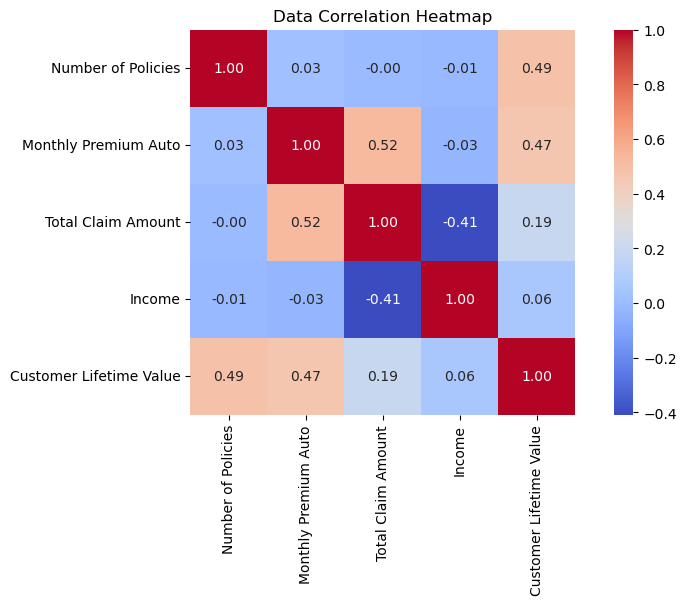

In [16]:
checknum_corr = df[numerical_df].corr(method='spearman')

plt.figure(figsize=(10,5))
sns.heatmap(data= checknum_corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Data Correlation Heatmap')
plt.show()

<i><u>Note:</u>

* The heatmap correlation result shows that 'Customer Lifetime Value' have a higher correlation (moderate) with 'Number of Policies' (0.49) and 'Monthly Premium Auto' (0.47), compared to other variables.
* Outlier in 'Customer Lifetime Value', 'Monthly Premium Auto', and 'Total Claim Amount' can be represent the customer with significant contribution in CLV.

Based on this point above, the decision is made to <b>not remove the outliers</b>, because outliers may provide insights into customer with significant contributions to business.<br>
</i>
...................................................................................................................................................................................................................................................................................................................................................

<b>Categorical Data :

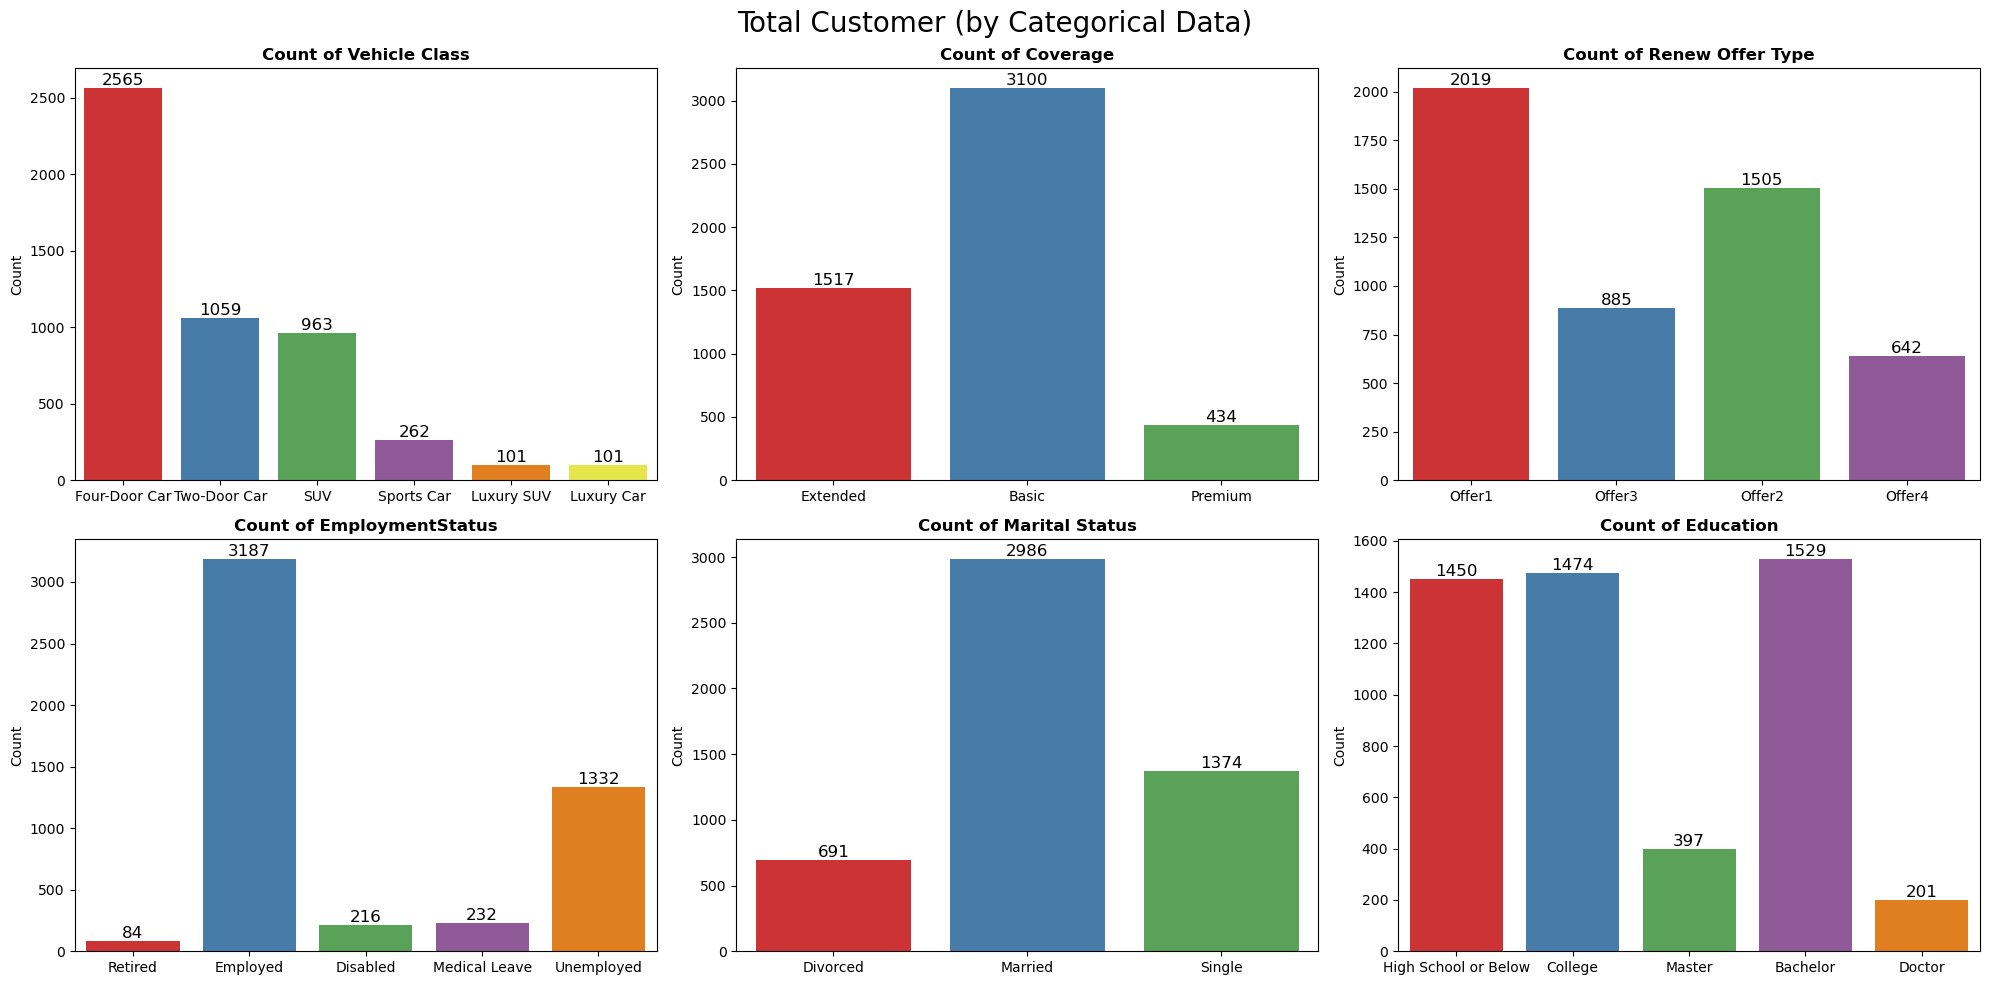

In [17]:
category_df = df.select_dtypes(include=['object']).columns

fig = plt.figure(figsize=(20, 10))
fig.suptitle("Total Customer (by Categorical Data)", size=20)

for i, col in enumerate(category_df):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df[col], hue=df[col], palette='Set1', legend=False)
    plt.title(f'Count of {col}', fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks()
    
    # Add label in the barplot
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().annotate(f'{int(height)}', 
                           (p.get_x() + p.get_width() / 2., height), 
                           ha='center', va='bottom', 
                           fontsize=12, color='black')

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


<i><u>Note:</u>

From the graph above, we can get some information about customer preferences :
* 'Four-door Car' is the most popular **vehicle class**, while 'Luxury Car' is the least popular. This also relate to the **coverage**, 'Four-door Car' has the highest coverage rate, while 'Luxury Car' has the lowest.
* For the **renew offer type**, 'Offer1' is the preferred choice among customers, followed by 'Offer2', then 'Offer3', and lastly 'Offer4'.

Also information about customer demographics:
* Based on **employment status**, the majority of customer here are 'Employed', indicates that employed customer most likely potential to the company (financially stable).
* Based on **marital status**, the majority of customer are 'Married'. This indicates that married customer are more likely potential to purchase a car as their family needs.
* Based on **education**, the majority of customers have high education: 'Bachelor', 'College'. Followed by 'High School or Below', and the 'Master', 'Doctor' are the least.
</i>
..............................................................................................................................................................................................................................................................................................................................................

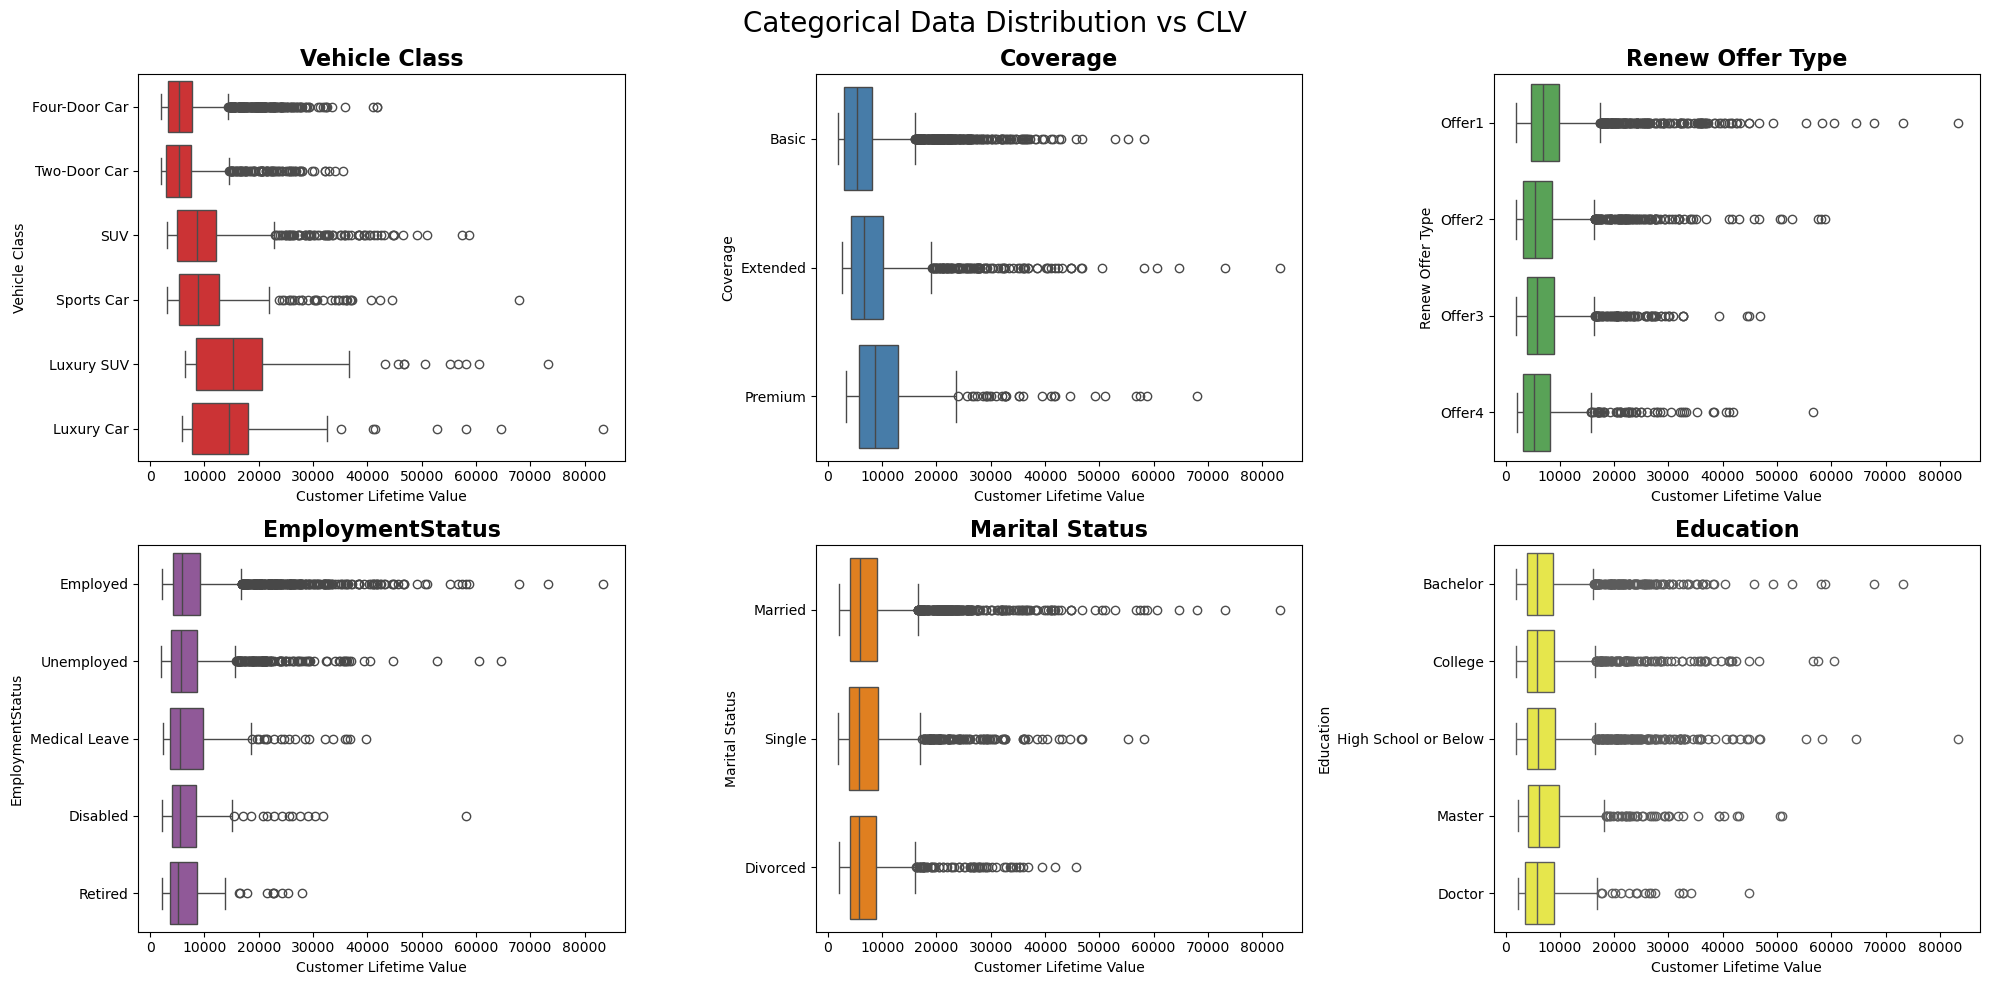

In [18]:
# Categorical data distribution vs CLV

fig = plt.figure(figsize=(20, 10))
fig.suptitle("Categorical Data Distribution vs CLV", size=20)

num_subplot = 1

for i, col in enumerate(category_df, start=1):
    plt.subplot(2, 3, num_subplot)
    sns.boxplot(data=df, y=col, x='Customer Lifetime Value', order=df[col].value_counts().index, color=sns.color_palette('Set1')[i-1])
    plt.title(col, size=16, fontweight='bold')
    plt.tight_layout()
    num_subplot += 1

plt.show()

---

# DATA PREPROCESSING

In [19]:
# Train test split & hyperparameter tuning
from sklearn.model_selection import train_test_split,RandomizedSearchCV

# Encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# Column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Cross validation
from sklearn.model_selection import cross_val_score, cross_validate, KFold, GridSearchCV

# Model benchmark
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

# Ensemble 
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor

# Metrics 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [20]:
df_model = df.copy()

<b>Train-Test Split :

In [21]:
X = df_model.drop(columns='Customer Lifetime Value')
y = df_model['Customer Lifetime Value']

# Train-test data splitting (70:30)
x_train, x_test, y_train, y_test= train_test_split(X, y,  test_size=0.2, random_state=1)

In [22]:
X.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0


<b> Encoding :</b>

From the 'X' data, we will do the encoding process (categorical --> numerical) :
* Onehot (Nominal)  : 'Vehicle Class', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status' 
* Ordinal : 'Coverage', 'Education'

In [23]:
# Ordinal unique values
print("'Coverage' unique values  :", X['Coverage'].unique())
print("'Education' unique values :", X['Education'].unique())

'Coverage' unique values  : ['Extended' 'Basic' 'Premium']
'Education' unique values : ['High School or Below' 'College' 'Master' 'Bachelor' 'Doctor']


In [24]:
# Ordinal encoder mapping
ordinal_mapping = [
    {'col': 'Coverage' , 'mapping': {'Basic': 1, 'Extended': 2, 'Premium': 3}},
    {'col': 'Education', 'mapping': {'High School or Below': 1, 'College': 2, 'Bachelor': 3, 'Master': 4, 'Doctor': 5}}
]

In [25]:
# Transformer column for data preprocessing
transformer = ColumnTransformer([
    ('onehot' , OneHotEncoder(drop='first'), ['Vehicle Class', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status']),
    ('ordinal', OrdinalEncoder(mapping = ordinal_mapping), ['Coverage', 'Education']),
    ('robustscale', RobustScaler(),['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Vehicle Class', 'Renew Offer Type',
                                  'EmploymentStatus', 'Marital Status']),
                                ('ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                          'data_type': dtype('O'),
                                                          'mapping': Basic       1
Extended    2
Premium     3
dtype: int64},
                                                         {'col': 'Education',
                                                          'data_type': dtype('O'),
                                                          'mapping': High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
dtype: int64}]),
                                 ['Coverage', 'Education']),
                                ('robustscale', RobustScaler(),
                                 ['Number of Policies', 'Monthly Premium Auto',
                                  'Total Claim Amount', 'Income'])])

<b> Model :

In [26]:
lr       = LinearRegression()
knn      = KNeighborsRegressor()
tree     = DecisionTreeRegressor(random_state=1)
bag      = BaggingRegressor(random_state=1)
xgb      = XGBRegressor(random_state=1)
rf       = RandomForestRegressor(random_state=1)
adaboost = AdaBoostRegressor(random_state=1)
gboost   = GradientBoostingRegressor(random_state=1)

log_lr   = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn  = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_tree = TransformedTargetRegressor(tree, func=np.log, inverse_func=np.exp)
log_bag  = TransformedTargetRegressor(bag, func=np.log, inverse_func=np.exp)
log_xgb  = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_rf   = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_ada  = TransformedTargetRegressor(adaboost, func=np.log, inverse_func=np.exp)
log_gb   = TransformedTargetRegressor(gboost, func=np.log, inverse_func=np.exp)

scaler = RobustScaler()

models = [log_lr, log_knn, log_tree, log_bag, log_xgb, log_rf, log_ada, log_gb]

model_rmse      = []
model_mean_rmse = []
model_std_rmse  = []

model_mae       = []
model_mean_mae  = []
model_std_mae   = []

model_mape      = []
model_mean_mape = []
model_std_mape  = []

for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    crossval_rmse = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(crossval_rmse, i)

    model_rmse.append(crossval_rmse)
    model_mean_rmse.append(crossval_rmse.mean())
    model_std_rmse.append(crossval_rmse.std())

    # MAE
    crossval_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(crossval_mae, i)

    model_mae.append(crossval_mae)
    model_mean_mae.append(crossval_mae.mean())
    model_std_mae.append(crossval_mae.std())

    # MAPE
    crossval_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(crossval_mape, i)

    model_mape.append(crossval_mape)
    model_mean_mape.append(crossval_mape.mean())
    model_std_mape.append(crossval_mape.std())

pd.DataFrame({
    'Model'     : ['LinearRegression', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'BaggingRegressor', 'XGBRegressor', 'RandomForestRegressor', 'AdaBoostRegressor', 'GradientBoostingRegressor'],
    'Mean_RMSE' : model_mean_rmse,
    'Std_RMSE'  : model_std_rmse,
    'Mean_MAE'  : model_mean_mae,
    'Std_MAE'   : model_std_mae,
    'Mean_MAPE' : model_mean_mape,
    'Std_MAPE'  : model_std_mape
})

[-6070.1476269  -6731.12540831 -6672.79585433 -6186.65663878
 -6785.72855921] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-3442.88816976 -3726.58923651 -3476.030124   -3477.65917855
 -3592.78543824] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.43233614 -0.42075339 -0.42111213 -0.43409923 -0.39183348] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-5906.31407039 -6392.70358763 -6608.49789712 -6342.14747201
 -6688.70288147] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-3311.65655031 -3543.16311699 -3441.3366689  -3496.63067917
 -3470.57591909] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                    

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,LinearRegression,-6489.290818,299.099269,-3543.190429,104.842913,-0.420027,0.015140
1,KNeighborsRegressor,-6387.673182,273.198435,-3452.672587,78.045378,-0.416153,0.018566
2,DecisionTreeRegressor,-5708.587396,272.679807,-2061.878571,106.662850,-0.148653,0.008265
3,BaggingRegressor,-4209.869806,138.565440,-1622.018953,83.589861,-0.111699,0.006381
4,XGBRegressor,-4253.634698,137.211012,-1715.254815,65.281808,-0.128167,0.005667
5,RandomForestRegressor,-4083.027130,180.956203,-1584.596525,84.881450,-0.108285,0.007124
6,AdaBoostRegressor,-4040.238766,237.758627,-2159.326739,105.404051,-0.204401,0.009940
7,GradientBoostingRegressor,-3958.708802,209.232500,-1547.990284,76.399748,-0.105701,0.004288


<i><u>Note:</u>

Based on the cross-validation result for regression models, **GradientBoostingRegressor** is the model with lowest mean_mae (-1547.990284) and a relatively small mean_mape (-0.105701), which may indicate that this model provide the best performance with smallest error prediction.<br>
However, **RandomForestRegressor** and **BaggingRegressor** should also be consider for further application, because even though their performance based on mean_rmse is slightly higher, their mean_mae is slightly lower.

So for the next step we will evaluate the performance of **GradientBoostingRegressor**, **RandomForestRegressor**, and **BaggingRegressor** on the test set.

Additional info :<br>
(1) mean RMSE : smaller value indicates better model performance (smaller prediction error).<br>
(2) mean MAE  : smaller value indicates better model prediction (smaller absolute error). -> as our indicator because we don't remove the outlier<br>
(3) mean MAPE : smaller value indicates more accurate model predictions.<br>
..................................................................................................................................................

<b> Model Evaluation :

In [27]:
# Model names for the evaluation
model_names = ['GradientBoosting', 'RandomForest', 'BaggingRegressor']

# Evaluation for models on the test set
eval_models = {
    'GradientBoosting' : GradientBoostingRegressor(random_state=1),
    'RandomForest'     : RandomForestRegressor(random_state=1),
    'BaggingRegressor' : BaggingRegressor(random_state=1)
}

score_rmse = []
score_mae  = []
score_mape = []

# Prediction on test set
for model_name, model in eval_models.items():
    pipeline = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', model)
    ])
    
    # Prediction
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

model_before_tuning = pd.DataFrame({
    'RMSE': score_rmse,
    'MAE': score_mae,
    'MAPE': score_mape
}, index=model_names)
model_before_tuning

,RMSE,MAE,MAPE
GradientBoosting,4188.233083,1820.197246,0.143505
RandomForest,4066.507739,1679.032034,0.117894
BaggingRegressor,4063.522821,1640.454805,0.114680


<b> Hyperparameter Tuning :

In [28]:
# Define parameter for each model
param_grid = {
    'RandomForestRegressor' : {
        'algo__n_estimators'     : [100, 200],
        'algo__max_depth'        : [10, 20],
        'algo__min_samples_split': [2, 5],
        'algo__min_samples_leaf' : [1, 2]},      # Adding min_samples_leaf for RandomForest

    'GradientBoostingRegressor' : {
        'algo__n_estimators'  : [100, 200],
        'algo__learning_rate' : [0.05, 0.1],
        'algo__max_depth'     : [3, 5],
        'algo__subsample'     : [0.8, 0.9]},   # Subsample is a key hyperparameter for boosting

    'BaggingRegressor' : {
        'algo__n_estimators'    : [100, 200],
        'algo__max_samples'     : [0.8, 1.0],  # max_samples in Bagging is important for ensemble methods
        'algo__max_features'    : [0.8, 1.0],
        'algo__bootstrap'       : [True, False]}    # Bootstrap sampling in Bagging
}

# Model initialization
models3 = {
    'RandomForestRegressor'     : RandomForestRegressor(random_state=0),
    'GradientBoostingRegressor' : GradientBoostingRegressor(random_state=0),
    'BaggingRegressor'          : BaggingRegressor(random_state=0)
}

best_models = {}

# Hyperparameter tuning with GridSearchCV
for name, model in models3.items():
    pipe = Pipeline([
        ('prep', transformer),  # Preprocessing
        ('algo', model)         # Model
    ])
    
    # GridSearchCV with cross-validation
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid[name],
        scoring='neg_mean_absolute_error',  # tune MAE
        cv=5,                               # 5-fold cross-validation
        verbose=1,                          # for progress information
        n_jobs=-1                           # use all available CPUs for faster execution
    )
    
    # Fit the model
    grid.fit(x_train, y_train)
    
    best_models[name] = grid.best_estimator_
    print(f"Best parameters for {name} : {grid.best_params_}")
    print(f"Best MAE for {name}        : {grid.best_score_:.4f}\n")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for RandomForestRegressor : {'algo__max_depth': 10, 'algo__min_samples_leaf': 2, 'algo__min_samples_split': 2, 'algo__n_estimators': 200}
Best MAE for RandomForestRegressor        : -1652.6964

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for GradientBoostingRegressor : {'algo__learning_rate': 0.05, 'algo__max_depth': 5, 'algo__n_estimators': 100, 'algo__subsample': 0.9}
Best MAE for GradientBoostingRegressor        : -1692.2865

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for BaggingRegressor : {'algo__bootstrap': True, 'algo__max_features': 1.0, 'algo__max_samples': 0.8, 'algo__n_estimators': 100}
Best MAE for BaggingRegressor        : -1680.9890



<u>Model Evaluation (after tunning) : 

In [29]:
final_results = []

for name, best_model in best_models.items():
    # Prediction on test data
    y_pred = best_model.predict(x_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae  = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    final_results.append({
        'Model' : name,
        'RMSE'  : rmse,
        'MAE'   : mae,
        'MAPE'  : mape
    })

print('Final Result')
final_results_df = pd.DataFrame(final_results)
final_results_df

Final Result


,Model,RMSE,MAE,MAPE
0,RandomForestRegressor,4045.362272,1642.980103,0.113587
1,GradientBoostingRegressor,4140.780804,1712.834466,0.124934
2,BaggingRegressor,4032.113116,1671.853740,0.117844


<i><u>Note:</u>

After the process of hyperparameter tuning and evaluation for regression models, **RandomForestRegressor** is the model with lowest mean_mae (1642.980103) and a relatively small mean_mape (0.113587), which may indicate that this model provide the best performance model.<br>
.........................................................................................

---

# RandomForest Model
<b> Train-Test Data for RF Model Evaluation : </b>

In [30]:
# Evaluate the best model
best_model = best_models['RandomForestRegressor']

# Prediction on train and test
y_train_pred = best_model.predict(x_train)
y_test_pred  = best_model.predict(x_test)

# Metrics for *train* data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train  = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

# Metrics for *test* data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test  = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print metrics
print("Train Performance:")
print(f"RMSE: {rmse_train:.2f}, MAE: {mae_train:.2f}, MAPE: {mape_train:.2%}")
print("\nTest Performance:")
print(f"RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}, MAPE: {mape_test:.2%}")

Train Performance:
RMSE: 2654.66, MAE: 1122.01, MAPE: 8.28%

Test Performance:
RMSE: 4045.36, MAE: 1642.98, MAPE: 11.36%


Based on the train-test performance, the result show that RandomForest model has an overfitting. 

In [31]:
# Define the hyperparameter for rf
hyperparam_randomforest = {
    'model__regressor__max_depth'            : range(2, 30, 1), 
    'model__regressor__n_estimators'         : range(50, 150, 20),
    'model__regressor__min_samples_leaf'     : range(20, 100, 1),
    'model__regressor__min_samples_split'    : range(2, 100, 1),
    'model__regressor__min_impurity_decrease': np.arange(0, 0.1, 0.01)
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=1)

# Apply logarithmic transformation to the target variable
log_rf = TransformedTargetRegressor(regressor=rf, func=np.log, inverse_func=np.exp)

# Create the pipeline (Assume 'transformer' is defined elsewhere)
estimator_rf = Pipeline([
    ('preprocessing', transformer),
    ('model', log_rf)
])

# Define cross-validation strategy
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning with RandomizedSearchCV
random_rf = RandomizedSearchCV(
    estimator_rf, 
    param_distributions=hyperparam_randomforest,
    n_iter=500,
    cv=crossval, 
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs=-1,
    refit='neg_mean_absolute_percentage_error',
    random_state=1  
)

In [32]:
# Fit to X_train y_train
random_rf.fit(x_train, y_train)

print('Random Forest Regressor')
print('Best_score  :', random_rf.best_score_)
print('Best_params :', random_rf.best_params_)

Random Forest Regressor
Best_score  : -0.1105752472085348
Best_params : {'model__regressor__n_estimators': 130, 'model__regressor__min_samples_split': 53, 'model__regressor__min_samples_leaf': 20, 'model__regressor__min_impurity_decrease': 0.0, 'model__regressor__max_depth': 26}


In [33]:
# Model RF after tuning
model = {'RandomForest_after_tuning': RandomForestRegressor(random_state=1)}

# Define model with the best estimator
rf_aftertuning = random_rf.best_estimator_
rf_aftertuning.fit(x_train, y_train)

# Predict to test set
y_pred_rf_aftertuning = rf_aftertuning.predict(x_test)

# RMSE, MAE, MAPE score
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_aftertuning))
mae_rf_tuning  = mean_absolute_error(y_test, y_pred_rf_aftertuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_aftertuning)

score_after_tuning_rf = pd.DataFrame({
    'RMSE': rmse_rf_tuning, 
    'MAE': mae_rf_tuning, 
    'MAPE': mape_rf_tuning
    }, index=model.keys())

score_after_tuning_rf

,RMSE,MAE,MAPE
RandomForest_after_tuning,4126.981017,1633.221098,0.106528


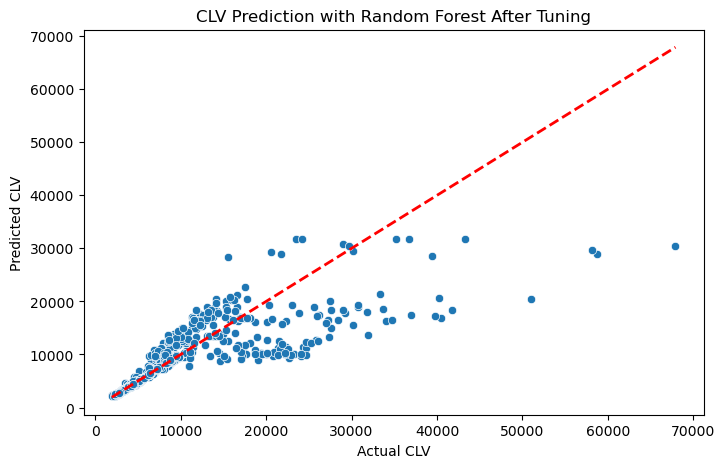

In [34]:
plt.figure(figsize=(8, 5))
plot = sns.scatterplot(x=y_test, y=y_pred_rf_aftertuning).set(title='CLV Prediction with Random Forest After Tuning', 
                                                               xlabel='Actual CLV', ylabel='Predicted CLV')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Ideal line
plt.show()

In [35]:
# Evaluate the tuned model
best_model = rf_aftertuning

# Prediction on train and test
y_train_pred = best_model.predict(x_train)
y_test_pred  = best_model.predict(x_test)

# Metrics for *train* data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train  = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

# Metrics for *test* data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test  = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print metrics
print("Train Performance RandomForest:")
print(f"RMSE: {rmse_train:.2f}, MAE: {mae_train:.2f}, MAPE: {mape_train:.2%}")
print("\nTest Performance RandomForest:")
print(f"RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}, MAPE: {mape_test:.2%}")

Train Performance RandomForest:
RMSE: 3742.07, MAE: 1475.15, MAPE: 10.05%

Test Performance RandomForest:
RMSE: 4126.98, MAE: 1633.22, MAPE: 10.65%


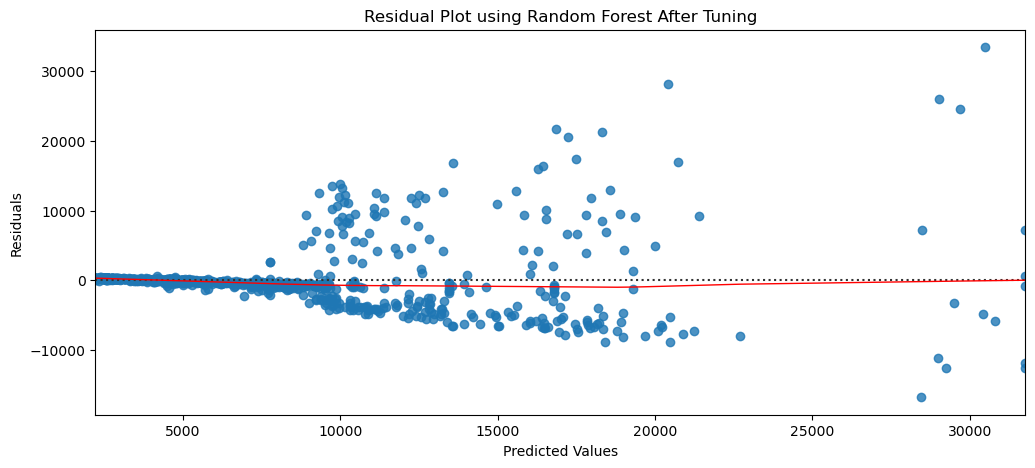

In [36]:
# Residual plot
residuals = y_test - y_pred_rf_aftertuning

# Create a residual plot
plt.figure(figsize=(12, 5))
sns.residplot(x=y_pred_rf_aftertuning, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot using Random Forest After Tuning')
plt.show()

<b>Feature Importance

In [37]:
# Ambil fitur nama setelah preprocessing
processed_features = best_model.named_steps['preprocessing'].get_feature_names_out(input_features=x_train.columns)

# Ambil feature importance dari model
feature_importance = best_model.named_steps['model'].regressor_.feature_importances_

# Buat DataFrame untuk feature importance
importance_df = pd.DataFrame({
    'Feature': processed_features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
16,robustscale__Number of Policies,0.743336
17,robustscale__Monthly Premium Auto,0.237915
19,robustscale__Income,0.005781
14,ordinal__Coverage,0.003771
18,robustscale__Total Claim Amount,0.003569
8,onehot__EmploymentStatus_Employed,0.001921
15,ordinal__Education,0.001076
5,onehot__Renew Offer Type_Offer2,0.000858
12,onehot__Marital Status_Married,0.000430
13,onehot__Marital Status_Single,0.000316


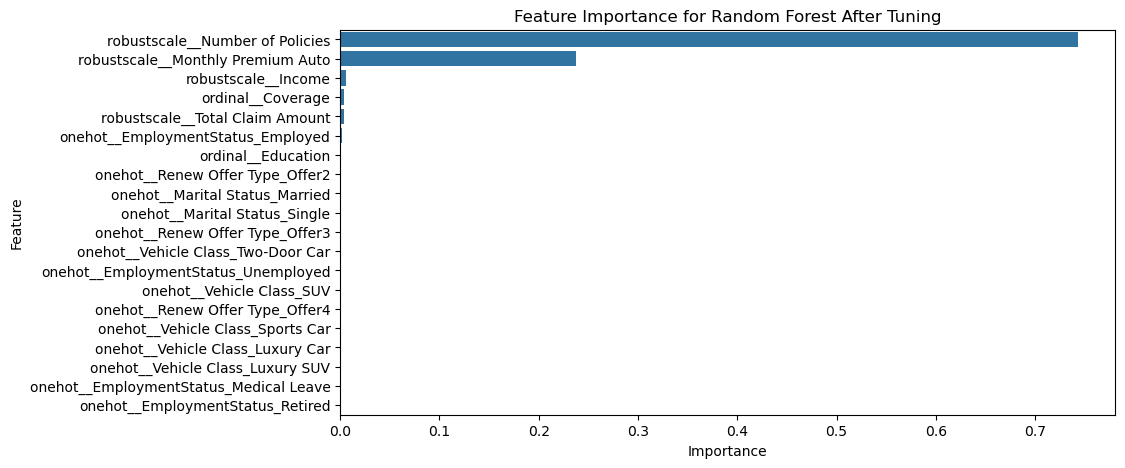

In [38]:
# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))  # Plot top 20 fitur
plt.title('Feature Importance for Random Forest After Tuning')
plt.show()

<i><u> Note:</u>

The feature importance analysis shows that variable: **Number of Policies** and **Monthly Premium Auto** are the most significant features. This makes sense for CLV in car insurance, where factors like the number of policies held and the premium amounts directly influence customer value. This insight can help in feature engineering and model optimization, ensuring that the most impactful variables are focused on for better model performance and understanding customer behavior in car insurance.


---
# Conclusion

* The performance of the RandomForestRegressor model shows that model can provide a reasonable prediction, even though the train and test performance metrics indicating some overfitting (RMSE and MAE on the test set are higher compared to the train set). <br>
However, the results are still promising, with a MAPE of around 10%, suggesting the model can be trusted to provide CLV calculation for the car insurance company. <br>
Note: if the test data differs significantly or large fluctuations in customer behavior, the model may not provide accurate results. Regular monitoring and adjustments to the model are recommended to maintain its relevance as data changes.

* The limitations of this project lie in the data available and the model’s tendency to overfit. Some features have a minimal impact on predictions, suggesting the potential for improving the model by incorporating additional features or using more advanced data processing techniques. To further enhance, the experiment with other models can be done to compare performance, also validate with more diverse data and increase the training data to reduce the risk of overfitting.




---
# Save to Pickle

In [43]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('best_model', RandomForestRegressor())])
estimator.fit(x_train, y_train)

with open('CLV_RFModel.pkl', 'wb') as file:
    pickle.dump(best_model, file)
print("File saved as: CLV_RFModel.pkl")

File saved as: CLV_RFModel.pkl


In [44]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('best_model', RandomForestRegressor())])
estimator.fit(x_train, y_train)

with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
print("File saved as: model.pkl")

File saved as: model.pkl
